In [161]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from scipy.integrate import solve_ivp
%matplotlib inline
import Optimisation
from importlib import reload
reload(Optimisation)
from Optimisation import *




In [162]:
def V(x):
    return (-1  -np.exp(-((x+15)/10)**2) \
              -2*np.exp(-((x-10)/10)**2) + \
                -np.exp(-((x-35)/10)**2) \
              -3*np.exp(-((x-60)/10)**2) \
                -np.exp(-((x-85)/10)**2)\
              -2*np.exp(-((x-110)/10)**2) \
              ) * \
            (1+1/5*np.cos(2*np.pi/2.5*x))

Accepted 285 out of 1000 samples: 28.5% acceptance rate
Accepted 775 out of 1000 samples: 77.5% acceptance rate
Accepted 972 out of 1000 samples: 97.2% acceptance rate


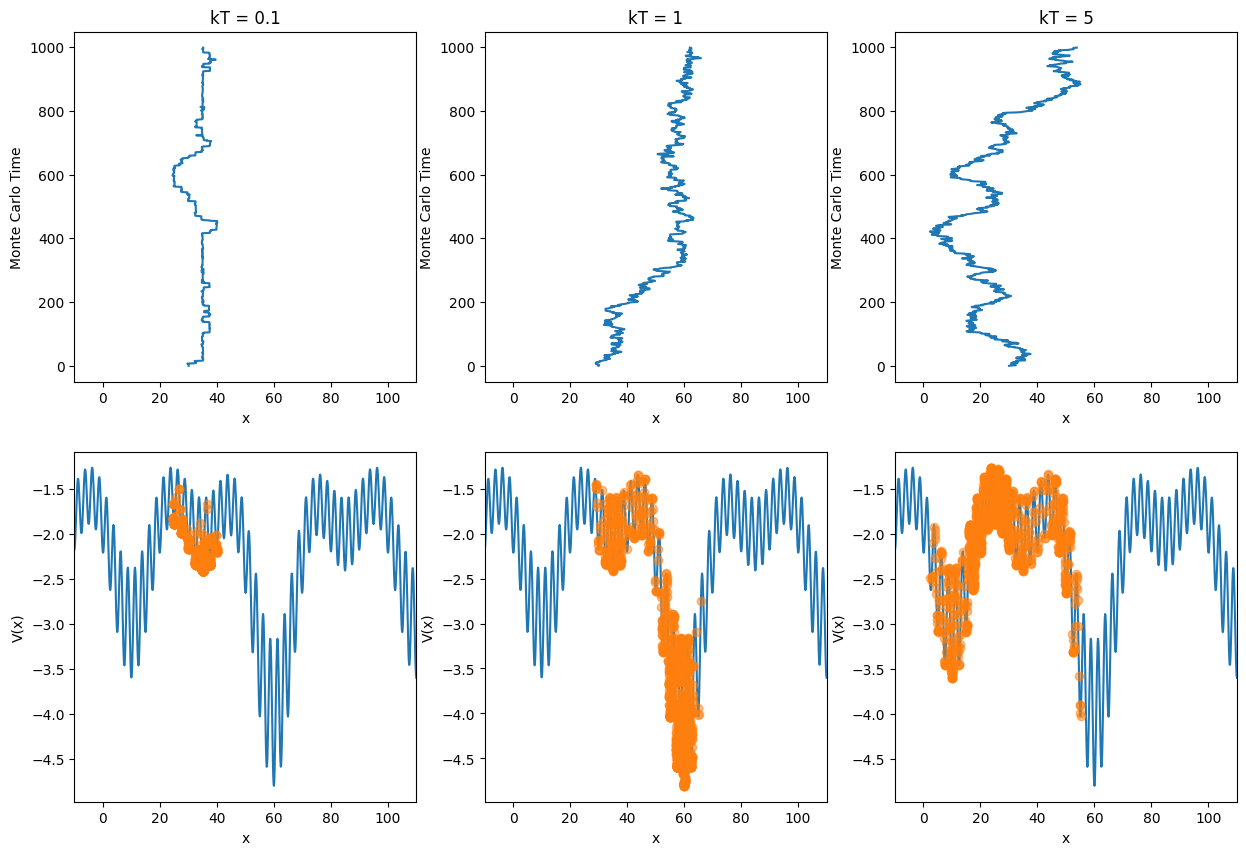

In [163]:
x_range =[-10, 110]


kTs = [0.1, 1, 5]

potentials = [Potential(V, x_range=x_range, kT=kT, delta_x=1) for kT in kTs]

initial_point = 30
N = 1000
fig, axs = plt.subplots(2, len(potentials), figsize = (15, 10))
for i, potential in enumerate(potentials):
    for ax in axs[:,i]:
        ax.set_xlim(x_range)
        ax.set_xlabel('x')
    axs[0,i].set_ylabel('Monte Carlo Time')
    axs[1,i].set_ylabel('V(x)')
    potential.plot_markov_chain(axs[0, i], N = N, initial_point = initial_point)
    potential.plot_V(axs[1,i])
    potential.plot_V_mcmc(axs[1,i], N = N, initial_point = initial_point)
    axs[0,i].set_title(f'kT = {potential.kT}')

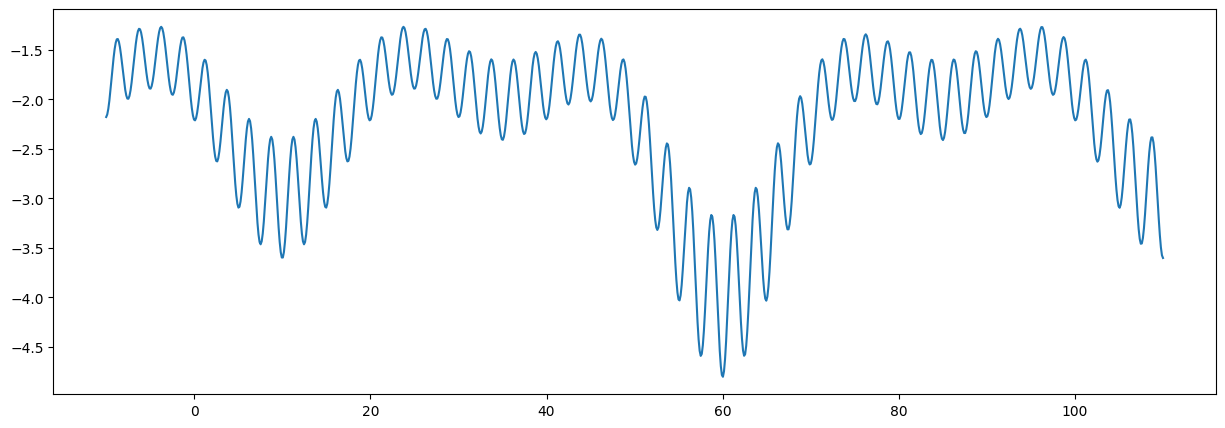

In [164]:
colors = ['r', 'g', 'b']
fig, ax = plt.subplots(figsize = (15, 5)) 
potentials[0].plot_V(ax)
N = 100
def update(i):
    updated_elements = []
    for potential, color in zip(potentials, colors):
        potential.draw(ax, i, color=color)
        updated_elements.append(potential.current_mcmc_plot[ax])
    return updated_elements



#anim = animation.FuncAnimation(fig, update, frames=N, blit=True)
#anim.save('markov_chain.gif', writer='imagemagick', fps=100)

In [165]:
N_walkers = 1000
N_steps = 5000

temperatures = [0.004, 0.02, 0.1, 0.5, 2.5]



calculated = True

if calculated == False:
    data_set = {f'{t}': None for t in temperatures}


for temperature in temperatures:
    for walker in range(0,N_walkers):
        potential = Potential(V, x_range=x_range, kT=temperature, delta_x=1)
        potential.sample_MCMC(N = N_steps, initial_point = np.random.uniform(*x_range), break_point = -4.75, write = False)
        steps_taken = len(potential.mcmc)
        if data_set[f'{temperature}'] is None:
            data_set[f'{temperature}'] = [steps_taken]
        else:
            data_set[f'{temperature}'].append(steps_taken)



c:\Users\tobia\ALLE_SCRIPTS\TobiasJohannessen.github.io\Computational Physics\Exercises\Week 3\Optimisation.py:195: RuntimeWarning: overflow encountered in exp
  P_frac = ( np.exp(-self.V(new_point)/(self.kT)) ) / ( np.exp(-self.V(current_point)/(self.kT)) )
c:\Users\tobia\ALLE_SCRIPTS\TobiasJohannessen.github.io\Computational Physics\Exercises\Week 3\Optimisation.py:195: RuntimeWarning: invalid value encountered in scalar divide
  P_frac = ( np.exp(-self.V(new_point)/(self.kT)) ) / ( np.exp(-self.V(current_point)/(self.kT)) )


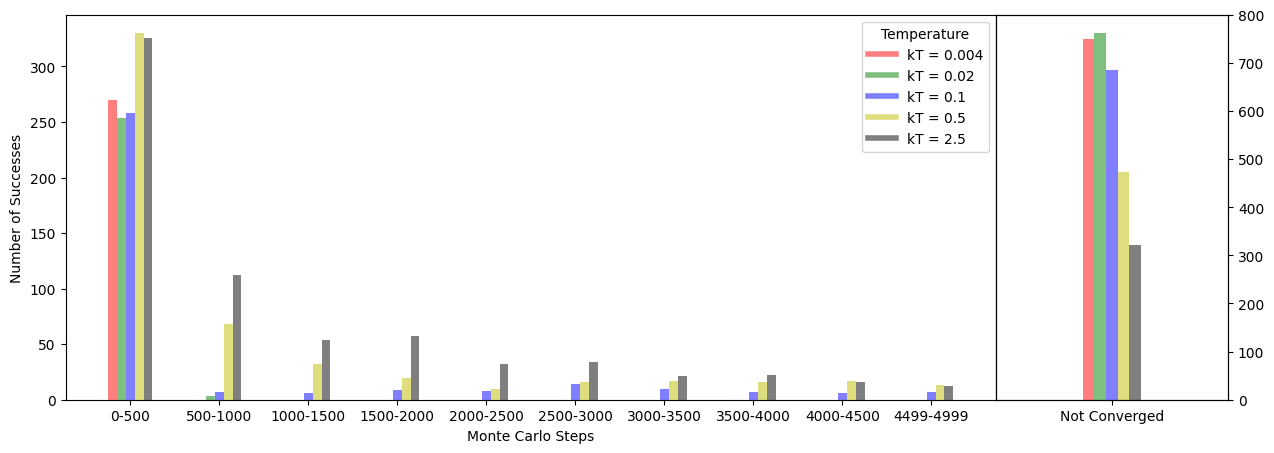

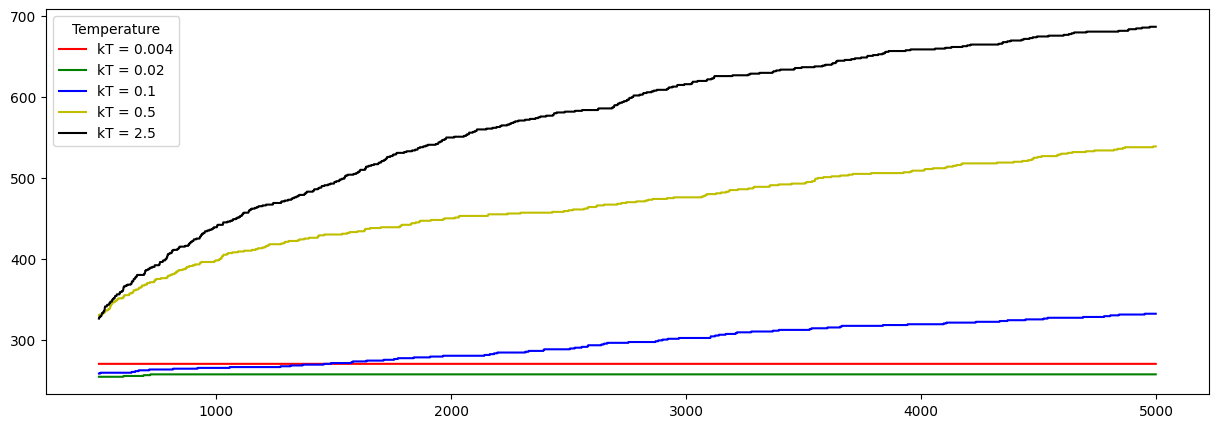

In [204]:
from matplotlib.lines import Line2D
fig, ax = plt.subplots(1,2, figsize = (15, 5), gridspec_kw= {'wspace': 0, 'width_ratios': [4, 1]})



ranges = 500 * np.arange(1,11)
colors = ['r', 'g', 'b', 'y', 'k']
ranges[-1] = 4999 #To remove all



for temperature, color, i in zip(temperatures, colors, range(len(temperatures))):
    for border in ranges:
        data_temp = np.array(data_set[f'{temperature}'])
        data = np.where(np.logical_and(data_temp > border - 500, data_temp < border))[0]
        
        ax[0].bar(i * 50 + border - 600, len(data), width = 50, color = color, alpha = 0.5)

    data_non_converged = np.where(data_temp >= ranges[-1])[0]
    ax[1].bar(i * 5 + ranges[-1] - 9, len(data_non_converged), width = 5, color = color, alpha = 0.5)
    
labels = [Line2D([0], [0], alpha = 0.5, color= color, lw=4, label= f'kT = {temperature}') for temperature, color in zip(temperatures, colors)]
ax[0].legend(handles=labels, title = 'Temperature', loc = 'upper right')
ax[0].set_xticks(np.arange(0, 5000, 500))
ax[0].set_xticklabels([f'{i - 500}-{i}' for i in ranges])
ax[0].set_xlabel('Monte Carlo Steps')
ax[0].set_ylabel('Number of Successes')

ax[1].set_xticks([5000])
ax[1].set_xticklabels(['Not Converged'])
ax[1].set_xlim(4950, 5050)
ax2 = ax[1].twinx()
ax2.set_yticks(ax[1].get_yticks())
ax[1].set_yticks([])


plt.savefig('Figures/Convergence.png')

fig,ax = plt.subplots(figsize = (15, 5))


points = np.linspace(ranges[0], ranges[-1], 5000)
for temperature, color in zip(temperatures, colors):
    cumulative = np.array([np.sum(data_set[f'{temperature}'] < point) for point in points])
    ax.plot(points, cumulative, color = color, label = f'kT = {temperature}')
ax.legend(title = 'Temperature')
    
